Solutions for https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md

In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
! curl https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv --output AB_NYC_2019.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6912k  100 6912k    0     0  6691k      0  0:00:01  0:00:01 --:--:-- 6691k


In [10]:
df = pd.read_csv("AB_NYC_2019.csv",header=0, sep=",")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## distribution of prices

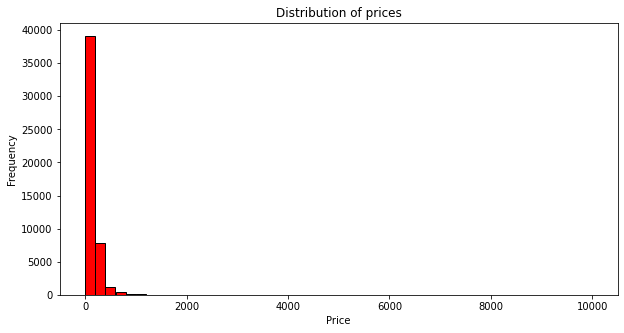

In [24]:
plt.figure(figsize=(10, 5))

sns.histplot(df["price"], color='red', alpha=1, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [25]:
columns = ["longitude", "latitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
          "calculated_host_listings_count", "availability_365"]

In [26]:
df = df[columns]
df.head()

,longitude,latitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-73.97237,40.64749,149,1,9,0.21,6,365
1,-73.98377,40.75362,225,1,45,0.38,2,355
2,-73.94190,40.80902,150,3,0,NaN,1,365
3,-73.95976,40.68514,89,1,270,4.64,1,194
4,-73.94399,40.79851,80,10,9,0.10,1,0


## Q1 Feature with missing values

In [85]:
missings= [k for k,v in dict(df.isnull().sum()).items() if v>0]
missings

['reviews_per_month']

## Q2 median of `minimum_nights`

In [47]:
df["minimum_nights"].median(axis=0)

3.0

### splitting the data

In [54]:
RANDOM_SEED=42
N = df.shape[0]

In [59]:
np.random.seed(RANDOM_SEED)

N_TEST = int(0.2 * N)
N_VAL = int(0.2 * N)
N_TRAIN = N - (N_TEST + N_VAL)
assert N_TEST+N_VAL+N_TRAIN == N

In [64]:
df["price"] = np.log1p(df["price"])
df["price"].head()

0    1.793530
1    1.859501
2    1.794635
3    1.704713
4    1.685370
Name: price, dtype: float64

In [66]:
idx = np.arange(N)
np.random.shuffle(idx)
df_shfld = df.iloc[idx]
df_shfld.head()

,longitude,latitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
33684,-73.90795,40.74465,1.545194,30,0,NaN,103,0
18067,-73.85219,40.75134,1.683065,2,83,2.32,6,320
33335,-73.94709,40.78351,1.673489,1,6,0.66,1,0
15553,-73.94405,40.72191,1.631370,1,2,0.05,1,0
28914,-73.93262,40.69049,1.646667,2,23,1.25,4,319


In [128]:
df_train = df_shfld.iloc[:N_TRAIN].copy()
df_train.head()

,longitude,latitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
33684,-73.90795,40.74465,1.545194,30,0,NaN,103,0
18067,-73.85219,40.75134,1.683065,2,83,2.32,6,320
33335,-73.94709,40.78351,1.673489,1,6,0.66,1,0
15553,-73.94405,40.72191,1.631370,1,2,0.05,1,0
28914,-73.93262,40.69049,1.646667,2,23,1.25,4,319


In [129]:
df_val = df_shfld.iloc[N_TRAIN:N_TRAIN+N_VAL].copy()
df_test = df_shfld.iloc[N_TRAIN+N_VAL:].copy()

In [130]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [131]:
y_train = df_train["price"]
del df_train["price"]
y_test = df_test["price"]
del df_test["price"]
y_val = df_val["price"]
del df_val["price"]

## Q3 Best way to fill NAs

In [177]:
missings[0]

'reviews_per_month'

In [133]:
df_train_na0 = df_train.copy()
X_train_na0 = df_train_na0.fillna(0).values
df_train_namean = df_train.copy()
X_train_namean = df_train_namean.fillna(df_train_namean["reviews_per_month"].mean()).values

In [147]:
X_val_na0 = df_val.copy().fillna(0).values
X_val_namean = df_val.copy().fillna(df_train_namean["reviews_per_month"].mean()).values

In [232]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [149]:
w_0_na0, w_na0 = train_linear_regression(X_train_na0, y_train.values)

y_pred_na0 = w_0_na0 + X_val_na0.dot(w_na0)

rmse_na0 = rmse(y_val.values, y_pred_na0)
print(f'trained w/ na=0: {rmse_na0}')


trained w/ na=0: 0.11285601260605871


In [150]:
w0_namean, w_namean = train_linear_regression(X_train_namean, y_train.values)

y_namean = w0_namean + X_val_namean.dot(w_namean)

rmse_namean = rmse(y_val.values, y_namean)
print(f'trained w/ na filled w/ means: {rmse_namean}')


trained w/ na filled w/ means: 0.11283767377796487


In [151]:
print("let's see which method for filling missing values is better:")
round(rmse_na0,2) , round(rmse_namean,2)

let's see which method for filling missing values is better:


(0.11, 0.11)

## Q4 Best regularization parameter r 

In [347]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [163]:
X_train = df_train.fillna(0).copy()
X_val = df_val.fillna(0).copy()
y_train = y_train.values
y_val=y_val.values
rfl = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [169]:
results = dict()
for r in rfl:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    _rmse = rmse(y_val, y_pred)
    results[r]=_rmse

In [178]:
opt_r = [1000,None]
for k,v in results.items():
    #v= round(v,2)
    print(f"r= {k} : RMSE: {v}")
    if opt_r[0] > v:
        opt_r[0] = v
        opt_r[1] = k

print(f"--------------\nBest performing R: {opt_r[1]} and its RMSE: {opt_r[0]}")
    

r= 0 : RMSE: 0.11285601260605871
r= 1e-06 : RMSE: 0.11285609914701861
r= 0.0001 : RMSE: 0.11286546346768472
r= 0.001 : RMSE: 0.11300740125405336
r= 0.01 : RMSE: 0.11517926658669758
r= 0.1 : RMSE: 0.11902183396356932
r= 1 : RMSE: 0.11991019704882605
r= 5 : RMSE: 0.12000226592562595
r= 10 : RMSE: 0.12001870830706979
--------------
Best performing R: 0 and its RMSE: 0.11285601260605871


#### conclusion : so we found that in this case we don't need regularization :)

## Q5 STD of RMSE scores for different seeds 

In [ ]:
"""
    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

    Note: Standard deviation shows how different the values are. 
    If it's low, then all values are approximately the same. 
    If it's high, the values are different. If standard deviation of scores is low, then our model is stable.
"""

In [296]:
def split_data_by_seed(df, random_seed, train_part=0.6, validation_part=0.2):
    _df = df.copy()
    N=len(_df)
    idx = np.arange(N)
    np.random.seed(random_seed)
    np.random.shuffle(idx)
    _df = _df.iloc[idx]
    n_train = int(train_part*N)
    n_val = int(validation_part*N)
    n_test = N - n_train - n_val
    assert N == n_train+n_val+n_test
    _df_train = _df.iloc[:n_train].copy()
    _df_val = _df.iloc[n_train:n_train+n_val].copy()
    _y_train = _df_train["price"].values
    _y_val = _df_val["price"].values
    del _df_train["price"]
    del _df_val["price"]
    return _df_train, _y_train , _df_val, _y_val

In [297]:
def run_and_eval_regression(X_t, y_t, X_v, y_v):
    w0, w = train_linear_regression(X_t, y_t)
    y_pred = w0 + X_v.dot(w)
    return rmse(y_v, y_pred)

In [298]:
SEEDS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dfs = pd.read_csv("AB_NYC_2019.csv",header=0, sep=",")
dfs = dfs[columns]
dfs["price"] = np.log1p(dfs["price"])
dfs = dfs.fillna(0)


In [325]:
results= dict()
for seed in SEEDS:
    Xtrain, ytrain, Xval,  yval =  split_data_by_seed(dfs, seed)
    results[seed] = run_and_eval_regression(Xtrain, ytrain, Xval,  yval)
results

{0: 0.6549779960755547,
 1: 0.6462523685702768,
 2: 0.6476558177642316,
 3: 0.6375145069795572,
 4: 0.6445809083894904,
 5: 0.6305809995772125,
 6: 0.6297851917050146,
 7: 0.6506184266732509,
 8: 0.6489780353190494,
 9: 0.6437565168397322}

In [326]:
round(np.std([v for v in results.values()]),3)

0.008

## Q6 RMSE on test 

In [ ]:
"""
    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?
"""

In [370]:
df6 = pd.read_csv("AB_NYC_2019.csv",header=0, sep=",")
df6 = dfs[columns]
df6["price"] = np.log1p(df6["price"])
df6 = df6.fillna(0)

In [369]:
n6 = len(df6)
idx6 = np.arange(n6)
np.random.seed(9)
np.random.shuffle(idx6)
df6sh=df6.iloc[idx6]

In [361]:
n_train = int(0.8*n6)
n_test = int(0.2*n6)
assert n6 == n_train+n_test

df6_train = df6sh.iloc[:n_train].copy()
df6_test = df6sh.iloc[n_train:].copy()
y6_train = df6_train["price"].values
y6_test = df6_test["price"].values
del df6_train["price"]
del df6_test["price"]


In [365]:
w0 , w = train_linear_regression_reg(df6_train, y6_train, r=0.001)

y_pred = w0 + df6_test.dot(w)

rmse6 = rmse(y_pred,y6_test)
rmse6

0.11066689867758164